In [2]:
import os
import json
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import numpy as np
import pickle
import pandas as pd
import torch
import torch.nn.functional as F
import re

In [3]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'  # Catch errors immediately

import torch
torch.cuda.empty_cache()

In [4]:
from modules import (
    get_data_from_trajectory_id,
    create_simple_dataloader,
    Step_1,
    Step_2,
    CombinedHamiltonianLayer,
    SimpleStackedHamiltonianNetwork,
    ReverseStep2,
    ReverseStep1,
    ReverseCombinedHamiltonianLayer,
    InverseStackedHamiltonianNetwork,
    prediction_loss,
    prediction_loss_euclidean,
    load_checkpoint,
    count_parameters,
    hsic_loss_statistics_only,
    hsic_loss
    )

In [5]:
from modules import (    
    calculate_phi_A,
    add_phi_A_columns,
    plot_differencies,
    plot_prediction_vs_ground_truth,
    plot_euclidean_distance_over_time,
    test_model_in_single_trajectory,
    analyze_means_with_constants,
    visualize_trajectory_movements_with_std_ellipses,
    visualize_epoch_metrics,
    analyze_folders_means,
    analyze_mapping_net,
    test_model_in_all_trajectories_in_df,
    test_model_variance_in_all_trajectories_in_df,
    plot_prediction_losses,
    plot_variance_losses,
    test_model_with_varying_observed_points,
    test_model_variance_with_varying_observed_points,
    compute_jacobian_functional,
    compute_symplectic_product,
    check_canonical_transformation,
    test_canonical_tranformation_on_trajectory,
    )

In [6]:
save_dir_path = "./save_directory_7" 


In [7]:
with open("all_dataframes.pkl", "rb") as f:
    loaded_dfs = pickle.load(f)

# Access them like before:
train_df = loaded_dfs['train_df']
val_df = loaded_dfs['val_df']
test_df = loaded_dfs['test_df']

train_id_df = loaded_dfs['train_id_df']
val_id_df = loaded_dfs['val_id_df']
test_id_df = loaded_dfs['test_id_df']

with open("df_high_energy_revised.pkl", "rb") as f:
    df_high_energy_revised = pickle.load(f)

val_df_high_energy_revised = df_high_energy_revised['val_df_high_energy_revised']
val_id_df_high_energy_revised = df_high_energy_revised['val_id_df_high_energy_revised']

test_df_high_energy_revised = df_high_energy_revised['test_df_high_energy_revised']
test_id_df_high_energy_revised = df_high_energy_revised['test_id_df_high_energy_revised']

In [8]:
train_id_df_added = add_phi_A_columns(train_id_df)
val_id_df_added = add_phi_A_columns(val_id_df)
val_id_df_high_energy_revised_added = add_phi_A_columns(val_id_df_high_energy_revised)


📊 Metric summaries:
  Lowest loss of metric 'val_prediction_loss_' recorded in epoch 1008 with the value: 5.9184, the losses of the last 5 epochs are: ['5.9235', '5.9378', '5.9184', '5.9400', '5.9298']
  Lowest loss of metric 'train_variance_loss_' recorded in epoch 1001 with the value: 47.9259, the losses of the last 5 epochs are: ['48.0202', '48.0367', '48.0629', '48.1821', '48.0853']
  Lowest loss of metric 'train_prediction_loss_' recorded in epoch 972 with the value: 5.9718, the losses of the last 5 epochs are: ['6.1054', '6.1213', '6.1794', '6.1173', '6.1156']
  Lowest loss of metric 'val_variance_loss_training_set' recorded in epoch 1004 with the value: 47.8736, the losses of the last 5 epochs are: ['48.0985', '47.9263', '48.1058', '48.0124', '48.1261']
  Lowest loss of metric 'val_prediction_loss_training_set' recorded in epoch 999 with the value: 5.6621, the losses of the last 5 epochs are: ['5.6674', '5.6669', '5.6730', '5.6664', '5.6632']
  Lowest loss of metric 'val_varian

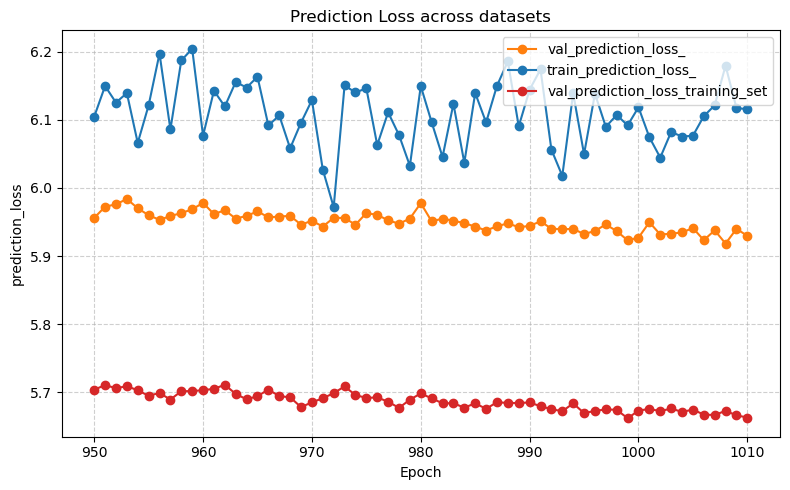

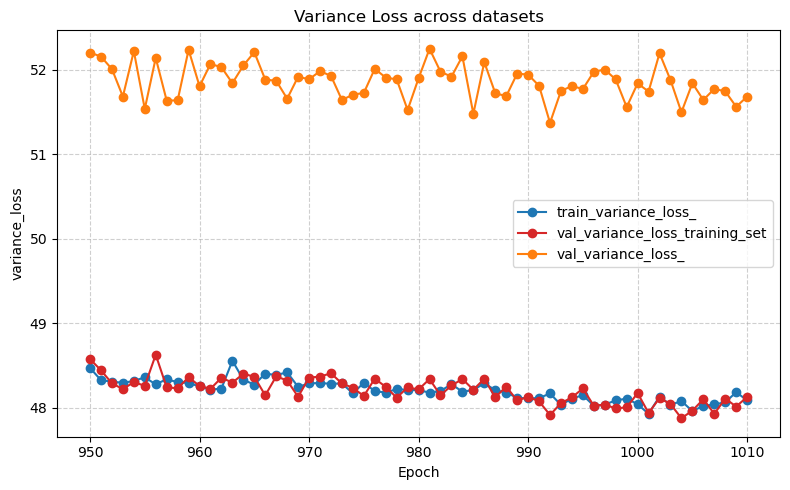

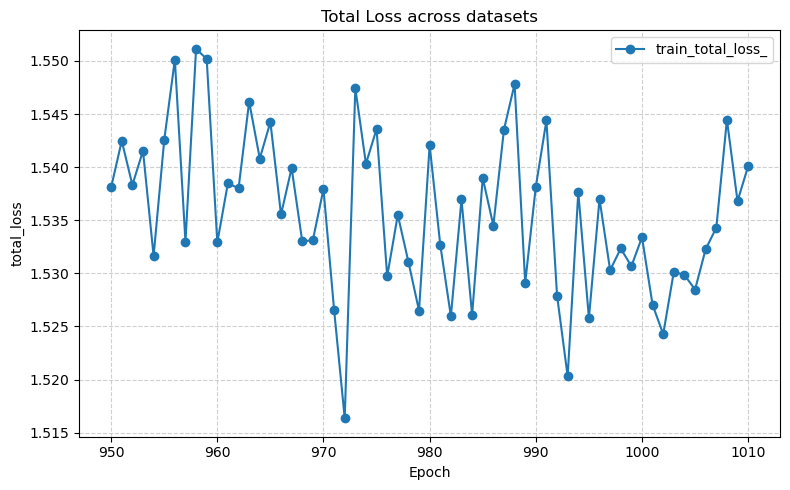

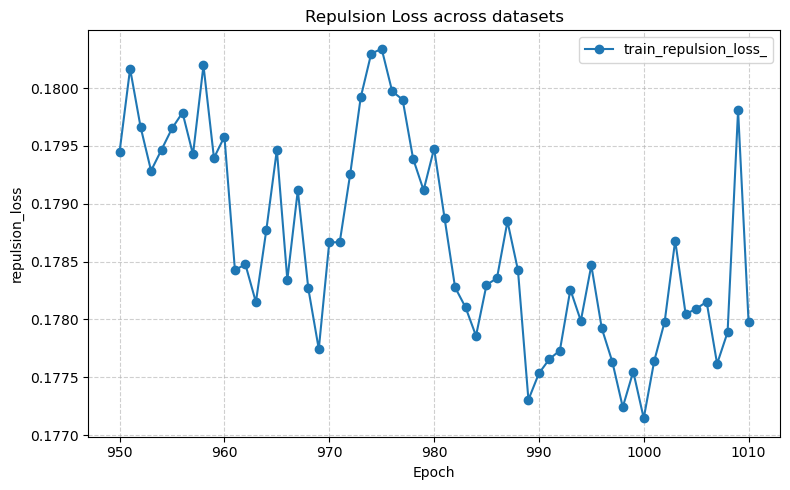

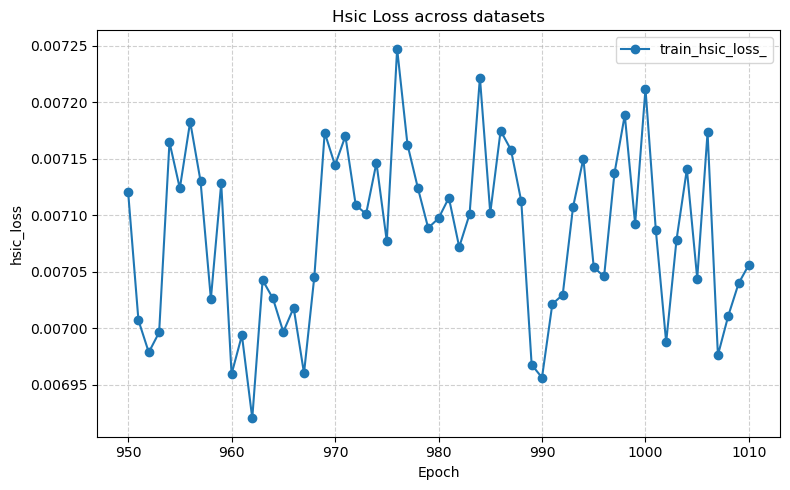

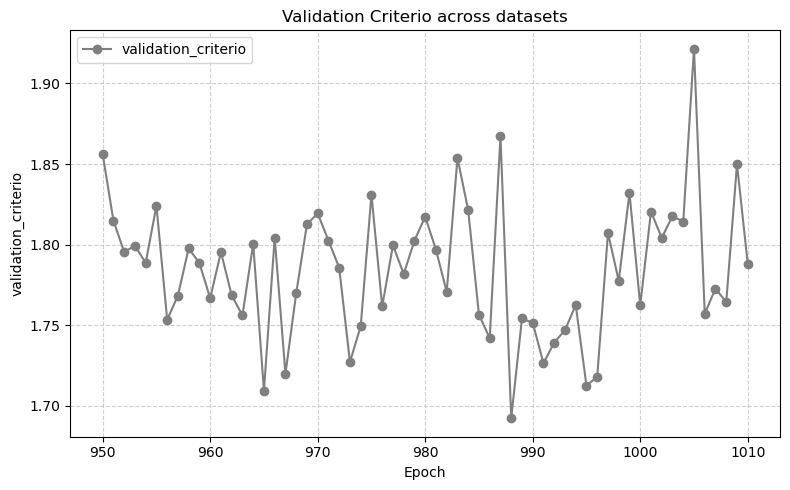

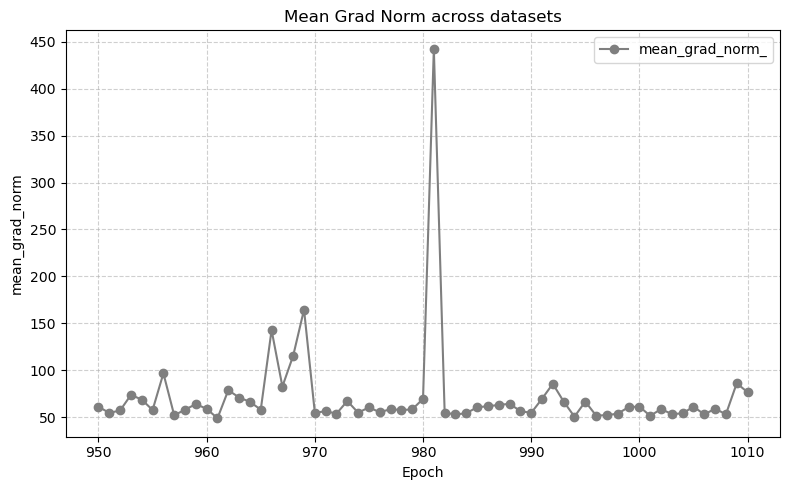

In [11]:
visualize_epoch_metrics(
 save_dir_path,
["val_prediction_loss_", "train_variance_loss_", "train_prediction_loss_", "val_variance_loss_training_set", "val_prediction_loss_training_set",  "val_variance_loss_", "train_total_loss_", "train_repulsion_loss_", "train_hsic_loss_" , "validation_criterio", "mean_grad_norm_"],
plot_on_same_graph=True,
verbose=True,
specific_epochs=[950,"last"]
)




📊 Processing directory: val_trajectories_data

For the epoch_850 in val_trajectories_data the values are:
92: X_mean = 7.5401 ± 4.6558, U_mean = -13.5801 ± 5.5518 and A=13.564677634903196, phi=-2.7802771843251053
64: X_mean = 5.5607 ± 3.8834, U_mean = -11.9749 ± 4.4809 and A=11.313750136394223, phi=-2.8600808883112765
6: X_mean = 3.6796 ± 4.4689, U_mean = -4.7791 ± 2.4103 and A=3.4643759649388923, phi=0.5272390069263062

📊 Processing directory: val_train_set_trajectories_data

For the epoch_850 in val_train_set_trajectories_data the values are:
2: X_mean = -1.9619 ± 2.9363, U_mean = -8.0034 ± 1.2197 and A=2.0004916751010886, phi=-1.322539930867642
120: X_mean = -1.1278 ± 7.7173, U_mean = 0.1019 ± 6.5847 and A=15.491933918298438, phi=-0.3577443145058989
96: X_mean = 2.6423 ± 5.5026, U_mean = 0.4204 ± 6.0482 and A=13.856421371448707, phi=0.050548714589954684

📊 Processing directory: val_high_energy_trajectories_data

For the epoch_850 in val_high_energy_trajectories_data the values are:

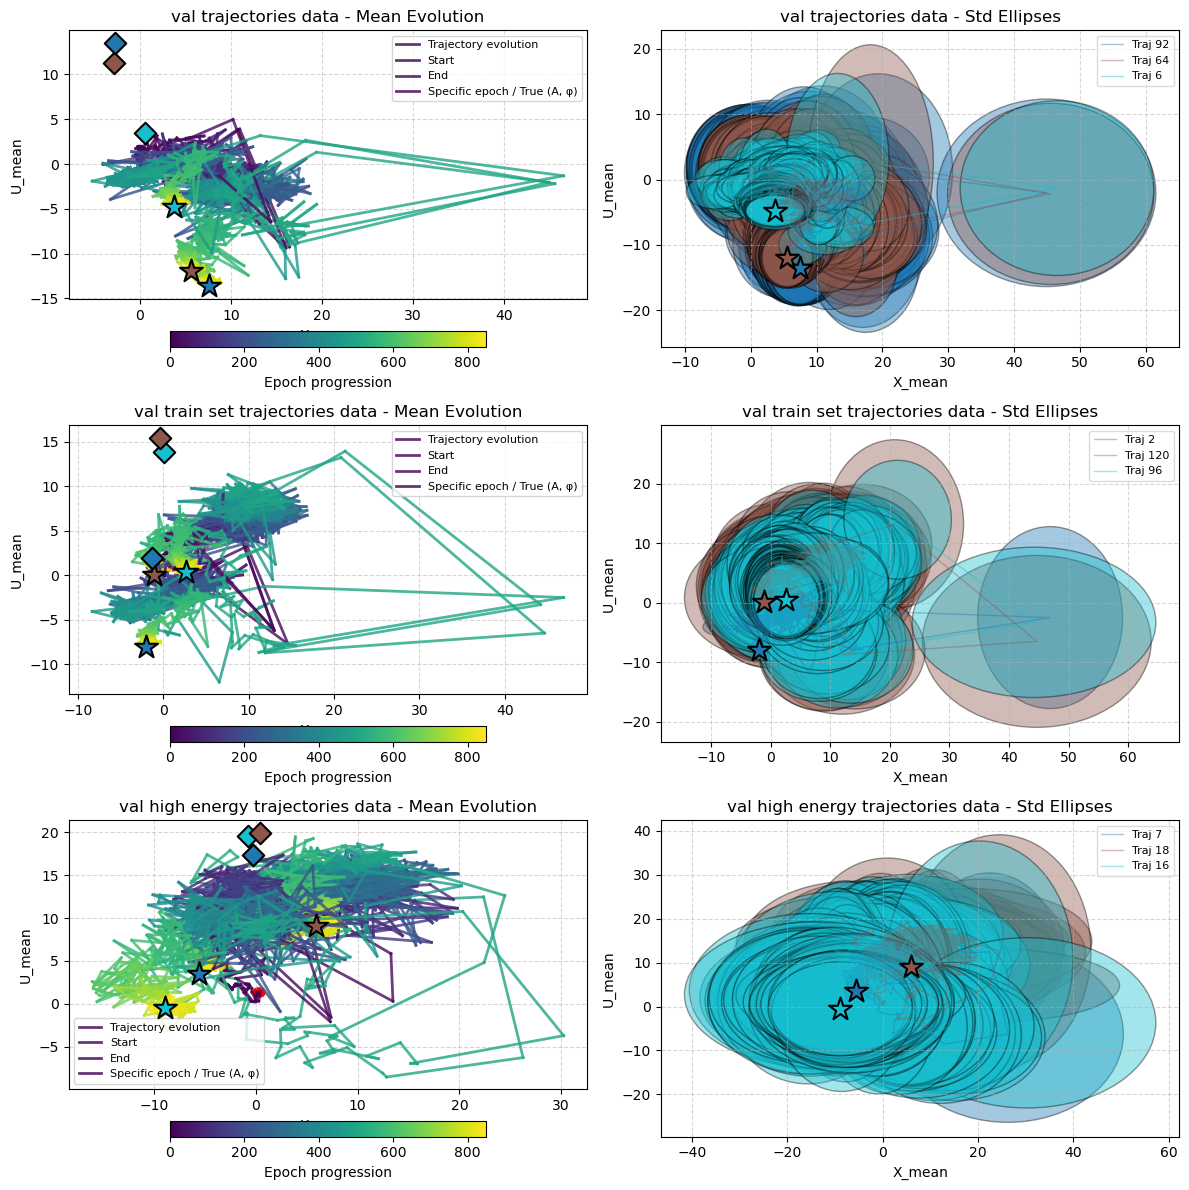


✅ Mean + Std (ellipse) visualization complete.


In [31]:
visualize_trajectory_movements_with_std_ellipses(save_dir_path, number_of_points_to_plot=3, right_plot_alpha=0.4, verbose=True, specific_epoch = "last", visualize_true_constants=True,train_id_df_added=train_id_df_added,val_id_df_added=val_id_df_added,val_id_df_high_energy_added=val_id_df_high_energy_revised_added)

In [32]:
val_differencies_df, val_train_differencies_set_df, val_high_energy_differencies_df = analyze_means_with_constants(
    save_dir_path=save_dir_path,
    specific_epoch="last",
    train_id_df_added=train_id_df_added,
    val_id_df_added=val_id_df_added,
    val_id_df_high_energy_added=val_id_df_high_energy_revised_added
)

📂 Using data from epoch: epoch_850
✅ Data extraction complete.


In [33]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['A']),
    y=torch.Tensor(val_train_differencies_set_df['phi']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.)

In [34]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['X_mean']),
    y=torch.Tensor(val_train_differencies_set_df['U_mean']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.0038)

0.0657

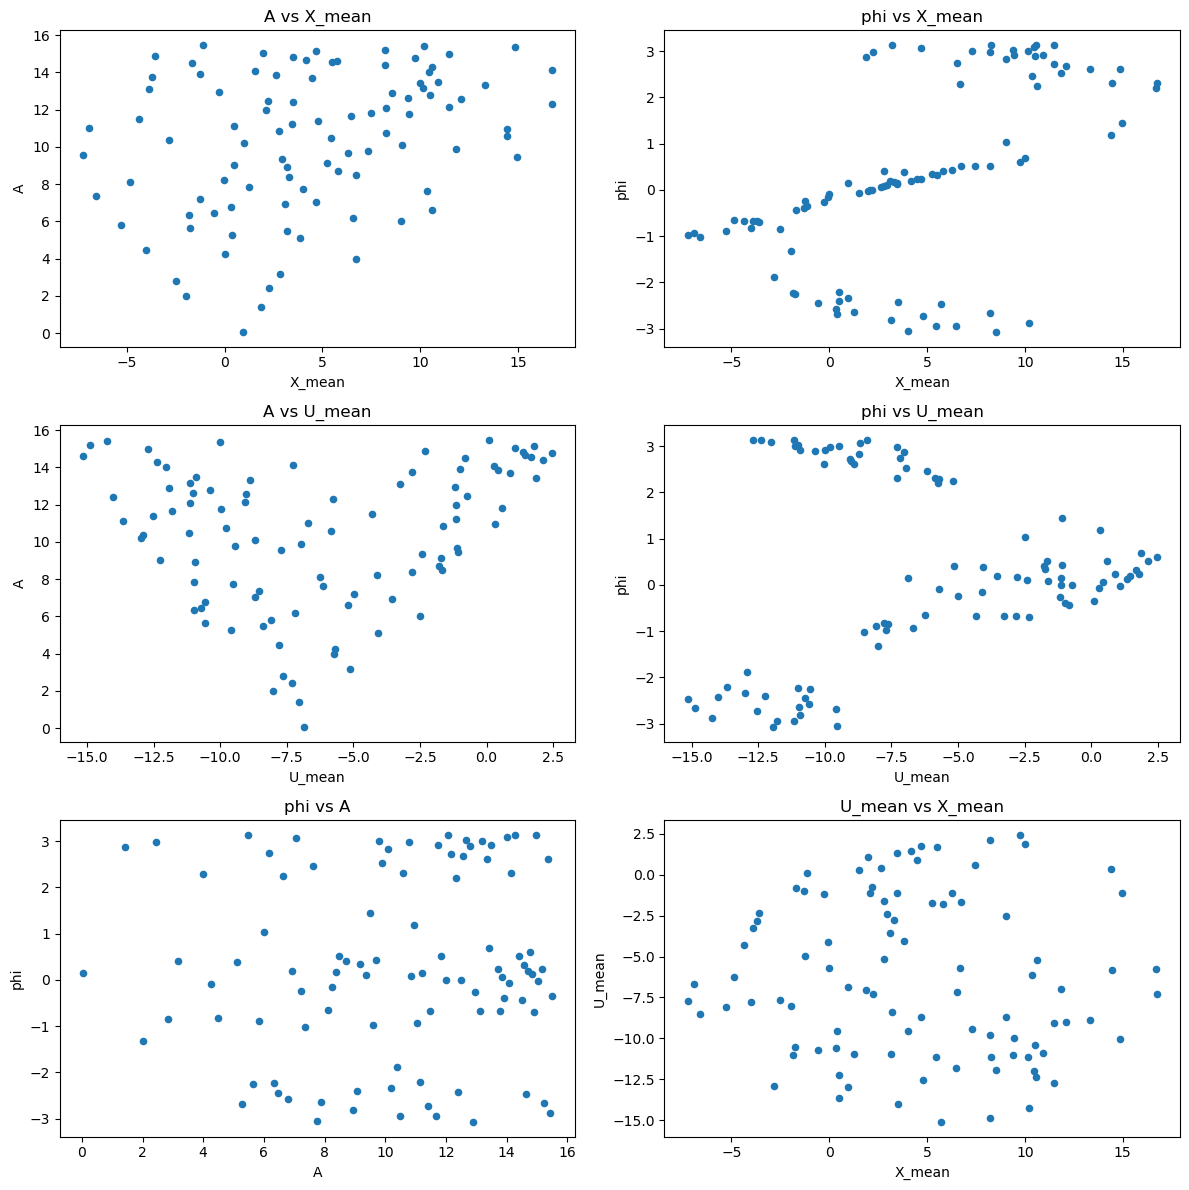

In [35]:
plot_differencies(val_train_differencies_set_df)

📊 Analyzing 105 epochs across 3 directories...

📁 Processing directory: val_trajectories_data

📁 Processing directory: val_train_set_trajectories_data

📁 Processing directory: val_high_energy_trajectories_data


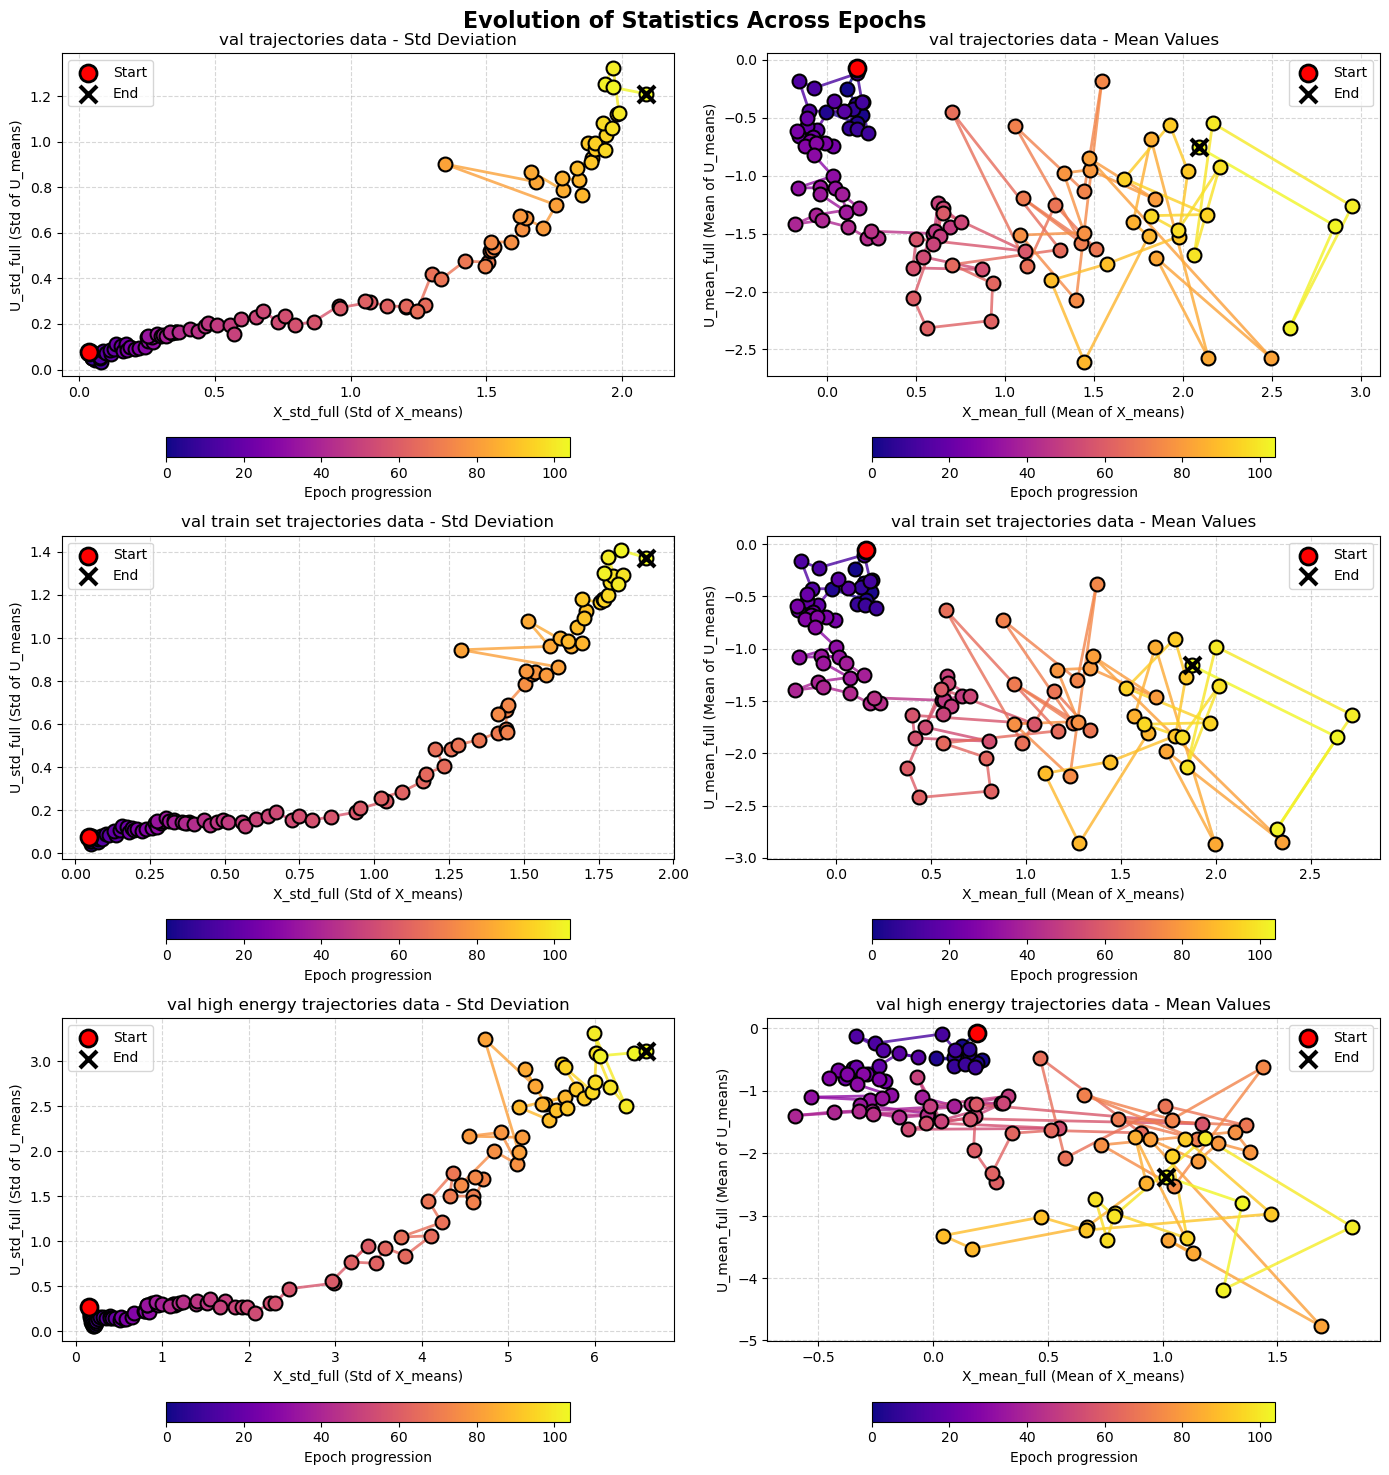

In [35]:
analyze_folders_means(save_dir_path, locate_epoch=None)

In [9]:
device = "cuda"
mapping_net = SimpleStackedHamiltonianNetwork(
        #Hpw many Step_1 + Step_2 layers to stack
    n_layers=10,
        # MLP Architecture parameters
    hidden_dims= [10, 20, 10],
    n_hidden_layers = None,   #Leave None if you provide list on hidden_dims
        
        # Activation parameters
    activation = 'gelu',
    activation_params = None,
    final_activation = None,   #Final layer activation function
    #final_activation_only_on_final_layer = True,
    tanh_wrapper = False,
        
        # Initialization parameters
    weight_init = 'orthogonal',
    weight_init_params = {'gain': 1},
    bias_init = 'zeros',
    bias_init_value = 0.0,
        
        
        # Architectural choices
    use_bias = True,
    use_layer_norm = False,
    
    # Input/Output parameters
    input_dim = 2,  # x or u and t
    output_dim = 1,  # scalar G or F
    a_eps_min= 0.5,  # Minimum value for a
    a_eps_max= 2,  # Maximum value for a  
    a_k= 0.1,

    step_1_a_mean_innit= 1.2,
    step_2_a_mean_innit= 1.2,
    std_to_mean_ratio_a_mean_init= 0.0,

    step_1_gamma_mean_innit= 0.5,
    step_2_gamma_mean_innit= 0.5,
    std_to_mean_ratio_gamma_mean_init= 0.0,

    step_1_c1_mean_innit= 0.0,
    step_2_c1_mean_innit= 0.0,
    std_to_mean_ratio_c1_mean_init= 1.0,

    step_1_c2_mean_innit= 0.0,
    step_2_c2_mean_innit= 0.0,
    std_to_mean_ratio_c2_mean_init= 1.0,

    bound_innit=0.0,
).to(device)

checkpoint_path = os.path.join(save_dir_path, "best_model.pt")

load_checkpoint(path=checkpoint_path, mapping_net=mapping_net, device=device, optimizer=None, scheduler=None)

inverse_net = InverseStackedHamiltonianNetwork(forward_network=mapping_net)


Successfully loaded model
Created inverse network with 10 reverse layers


/home/thomasdev/Desktop/Hamilton_Jacobi_NN/Hamilton_Jacobi_NN/modules.py:4082: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location=devic

In [10]:
test_canonical_tranformation_on_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, compute_jacobian_functional_function=compute_jacobian_functional, compute_symplectic_product_function=compute_symplectic_product, check_canonical_transformation_function=check_canonical_transformation, tolerance=1e-4, test_id_df=val_id_df, test_df=val_df, trajectory_id=50, mapping_net=mapping_net, inverse_net=inverse_net, device=device)

For the mapping network:
Samples [5] failed the canonical test
  Maximum error across all samples: 3.91e-03
For the inverse network:
✓ All 242 transformations are canonical (preserve symplectic structure)!
  Maximum error across all samples: 1.67e-06


In [10]:
count_parameters(mapping_net)

9500

   num_observed_points  mean_loss
0                    1   6.759316
1                    2  10.504749
2                    3   7.727937
3                    4   6.412544
4                    5   5.770989
5                    6   5.329151
6                    7   4.963250
7                    8   5.023685
8                    9   4.761801
9                   10   4.647867


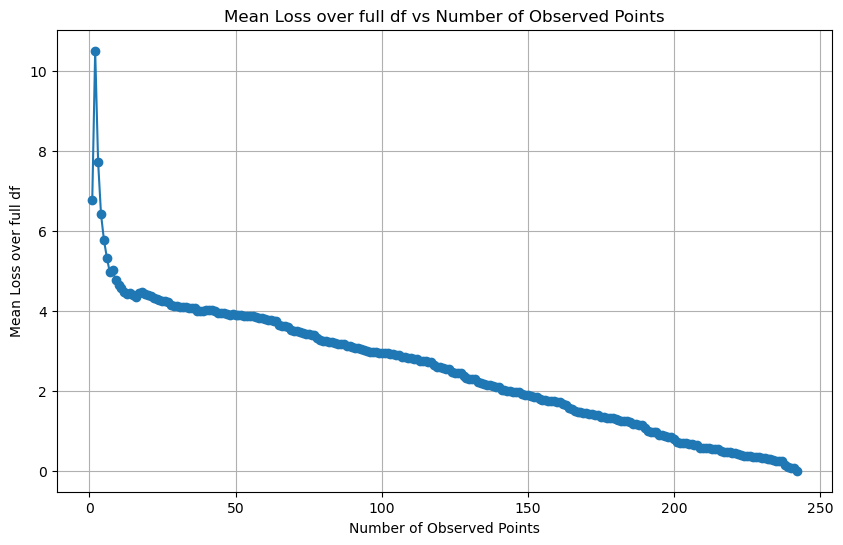

In [11]:
val_loss_per_points_df = test_model_with_varying_observed_points(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net, inverse_net=inverse_net, device=device)

   num_observed_points  mean_variance
0                    1       0.000000
1                    2      31.912251
2                    3     100.802097
3                    4      74.297728
4                    5      61.109400
5                    6      87.042114
6                    7      83.233552
7                    8      72.774404
8                    9      71.999037
9                   10      64.741609


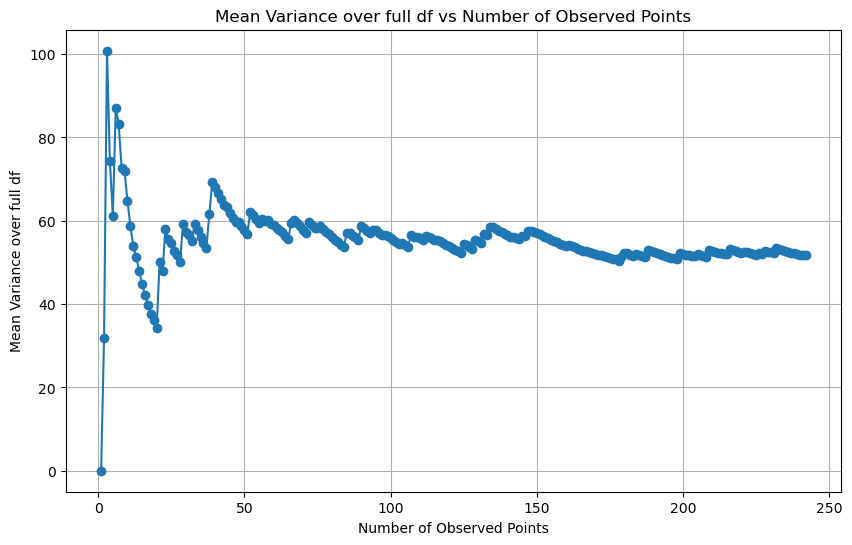

In [12]:
val_variance_per_points_df = test_model_variance_with_varying_observed_points(get_data_from_trajectory_id_function=get_data_from_trajectory_id ,test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net ,device=device)

In [13]:
point_indexes_observed = [0,10]

In [14]:
k=1
mass=1
constant = -(k / mass)
omega = np.sqrt(-constant)
period = 2*np.pi/omega

     trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
6                6    6.000950         2.788480              1.138302
11              11   11.000909         2.585738              0.779597
28              28   28.000769         4.967619              0.938779
43              43   43.000645         6.462793              0.985559
50              50   50.000587         4.004323              0.566293
64              64   64.000471         4.216947              0.527116
71              71   71.000413         4.547983              0.539745
85              85   85.000298         5.664065              0.614353
92              92   92.000240         5.667082              0.590833
93              93   93.000231         4.496908              0.466307
103            103  103.000149         5.188847              0.511272
114            114  114.000058         5.732799              0.536926
Mean prediction loss over full dataframe: 4.6936


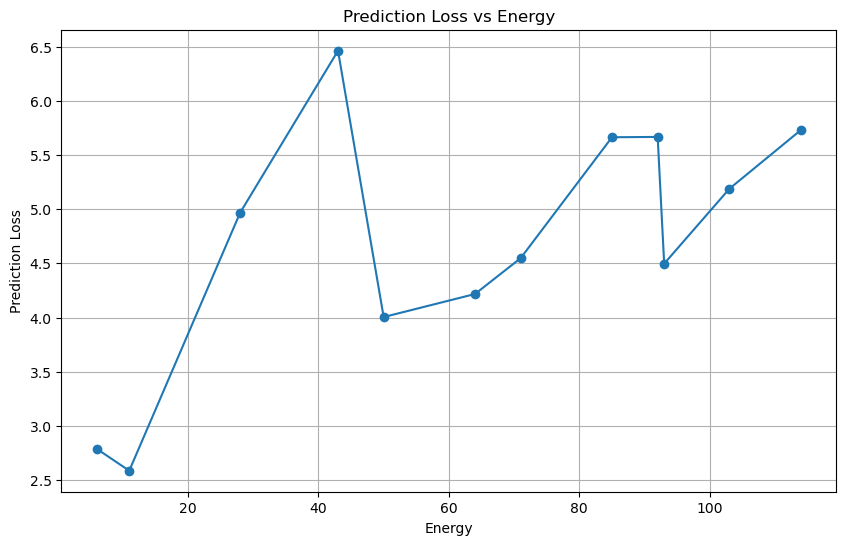

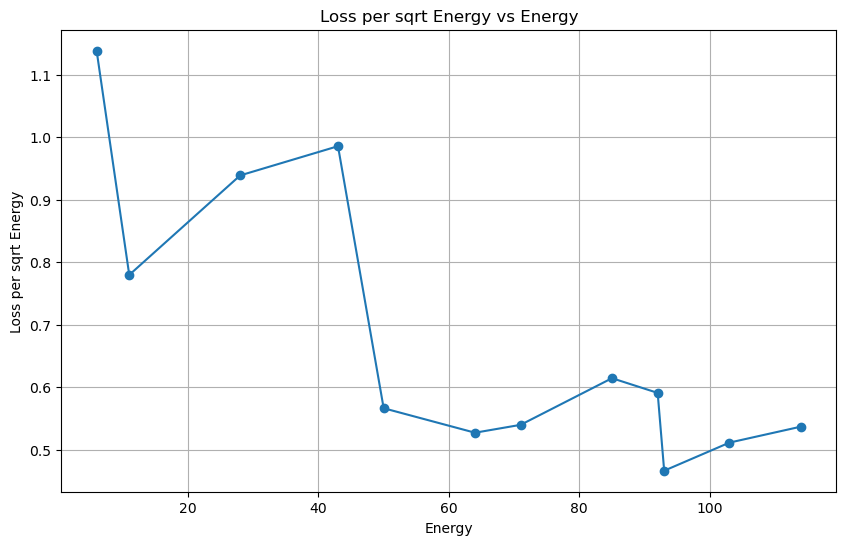

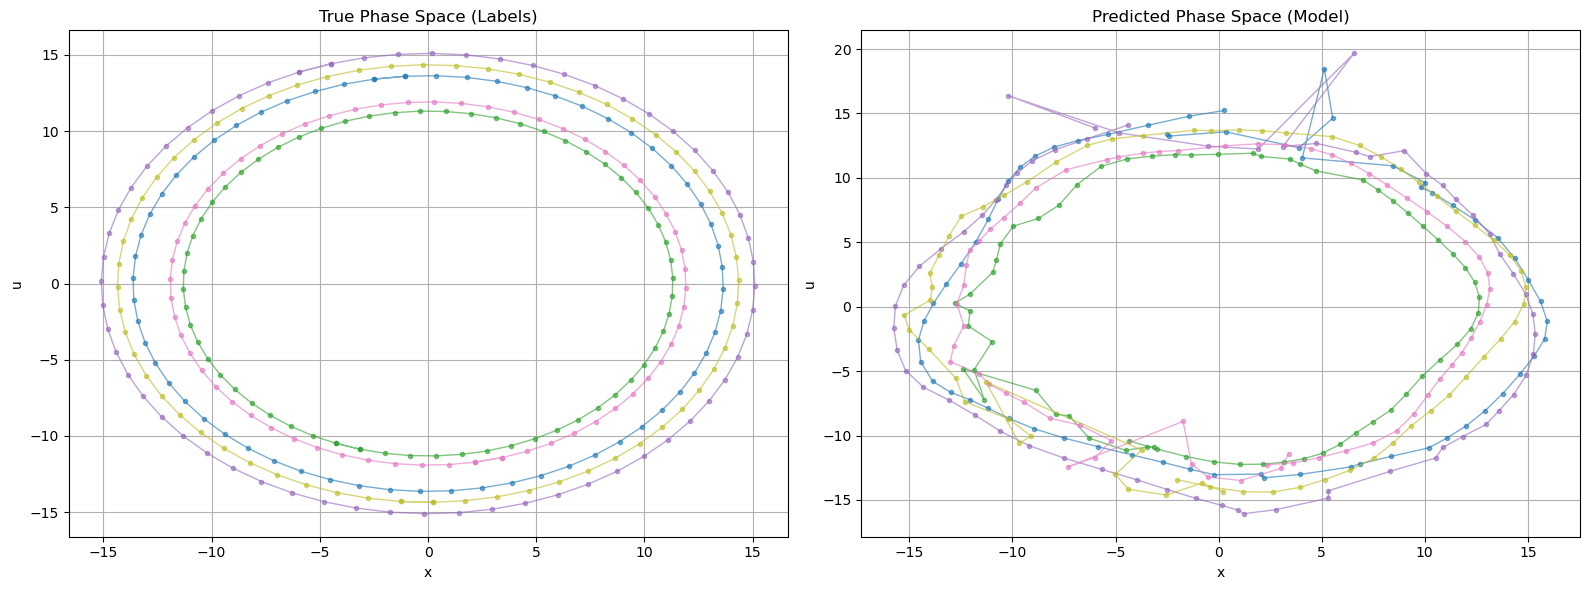

In [21]:
prediction_val_df, mean_prediction_loss_val, pred_val_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, recreate_and_plot_phase_space=True, plot_specific_portion=0.26, connect_points=True, plot_trajectories_subsample=0.4)

     trajectory_id      energy  variance_loss  variance_per_sqrt_energy
6                6    6.000950       0.217456                  0.088769
11              11   11.000909       0.172263                  0.051937
28              28   28.000769       3.061669                  0.578593
43              43   43.000645       4.268658                  0.650959
50              50   50.000587       0.234767                  0.033201
64              64   64.000471       2.197673                  0.274708
71              71   71.000413       0.651928                  0.077369
85              85   85.000298       0.017209                  0.001867
92              92   92.000240       3.674512                  0.383094
93              93   93.000231       0.094008                  0.009748
103            103  103.000149       0.252336                  0.024863
114            114  114.000058       6.978347                  0.653582
Mean prediction loss over full dataframe: 1.8184


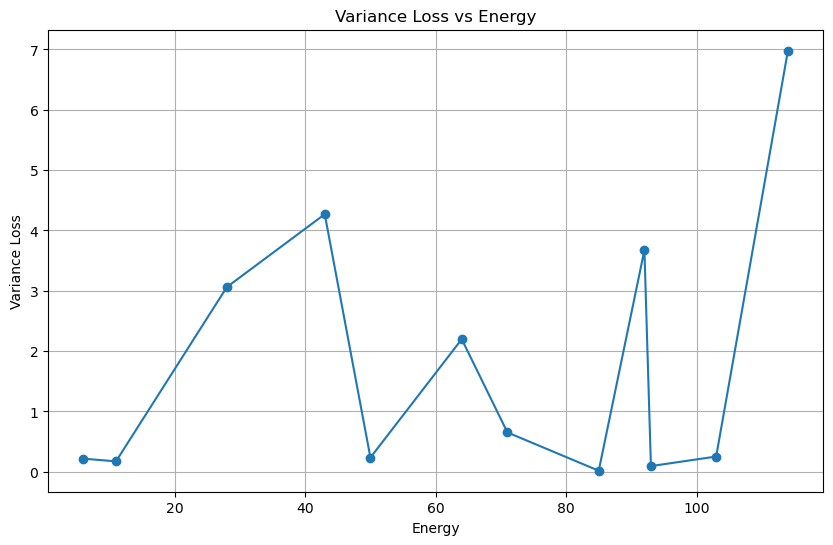

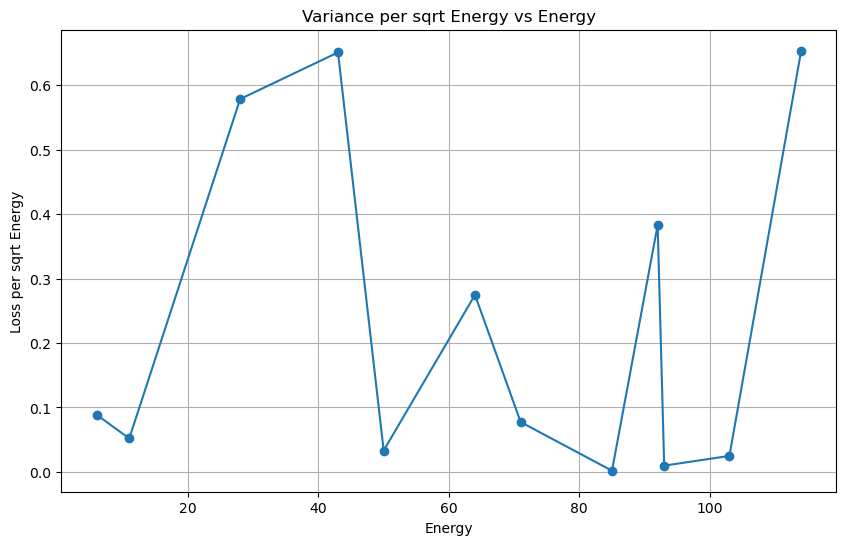

In [22]:
variance_val_df, mean_variance_loss_val = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed)


Observed time points: [0.        1.0471976]


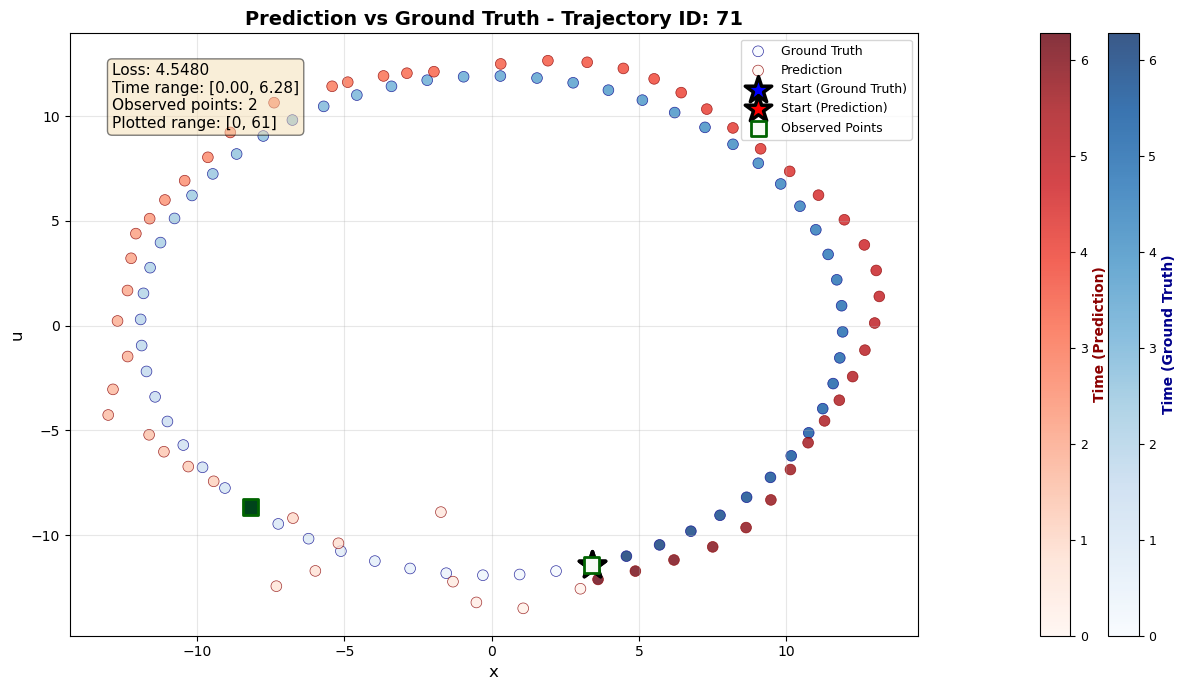

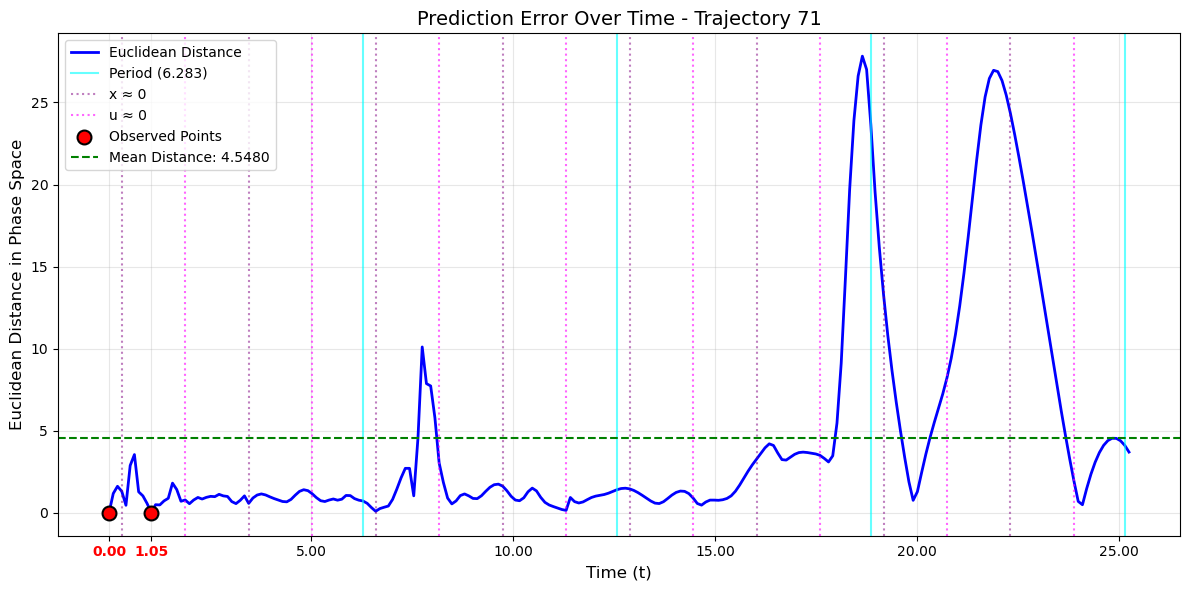

In [23]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df, test_df=val_df, trajectory_id=71, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[0,61], show_zeroings=True, show_period=True, period=period)

     trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
7                7    7.000942         2.129360              0.804768
12              12   12.000901         3.435160              0.991608
32              32   32.000736         4.167437              0.736697
37              37   37.000694         3.698189              0.607973
39              39   39.000678         3.094487              0.495510
53              53   53.000562         3.759217              0.516365
57              57   57.000529         9.643474              1.277303
67              67   67.000446         8.630999              1.054441
75              75   75.000380         5.436540              0.627756
81              81   81.000331         5.502444              0.611381
88              88   88.000273         4.341468              0.462801
101            101  101.000165         5.084361              0.505912
117            117  117.000033         6.108055              0.564690
Mean prediction loss

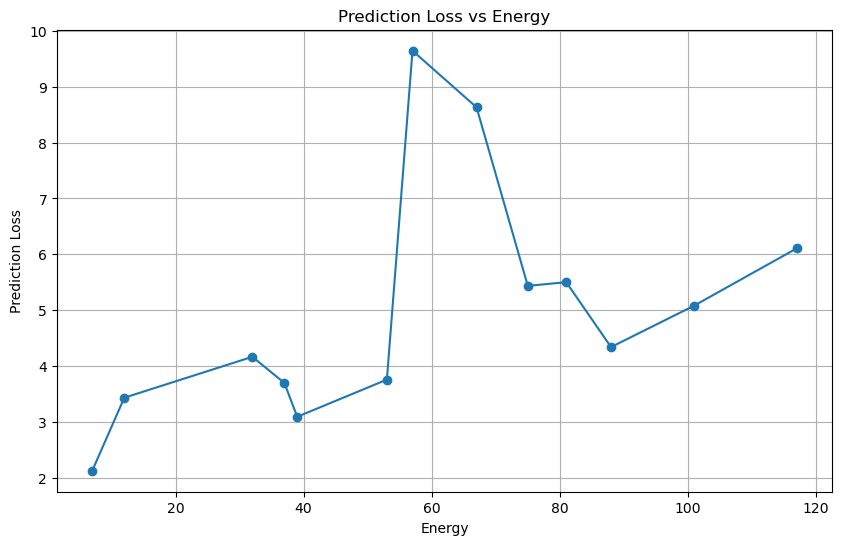

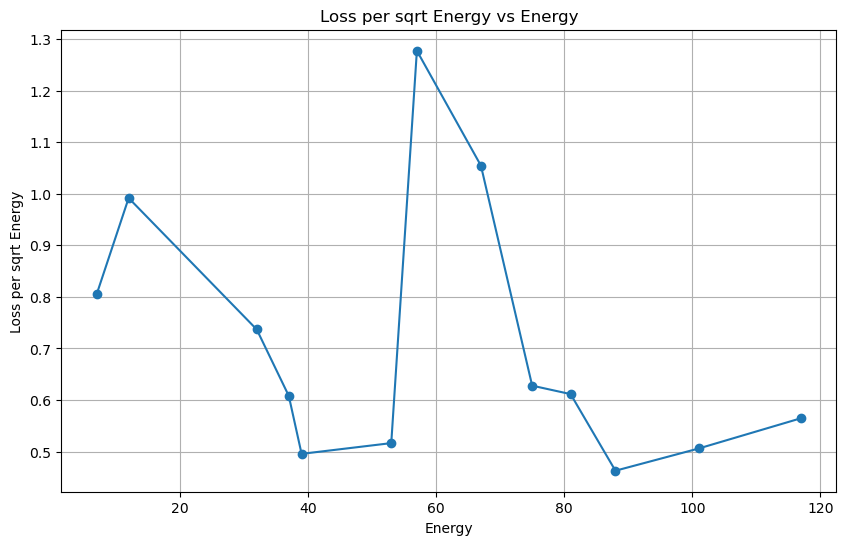

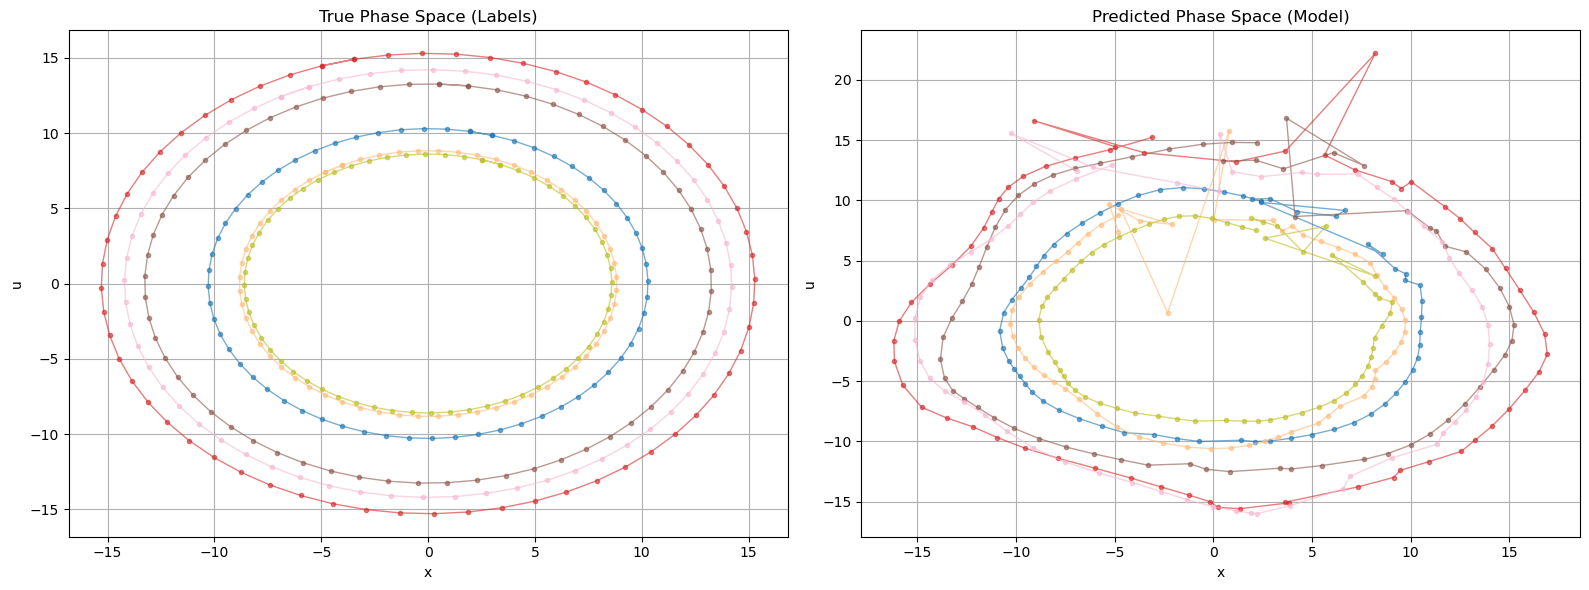

In [24]:
prediction_test_df, mean_prediction_loss_test, pred_test_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df, test_df=test_df, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, recreate_and_plot_phase_space=True, plot_specific_portion=0.26, connect_points=True, plot_trajectories_subsample=0.4)

     trajectory_id      energy  variance_loss  variance_per_sqrt_energy
7                7    7.000942       2.812910                  1.063109
12              12   12.000901       0.110034                  0.031763
32              32   32.000736       2.279396                  0.402940
37              37   37.000694       0.059585                  0.009796
39              39   39.000678       1.101171                  0.176327
53              53   53.000562       0.814633                  0.111898
57              57   57.000529       4.629520                  0.613192
67              67   67.000446       7.331367                  0.895666
75              75   75.000380       2.813757                  0.324904
81              81   81.000331       0.096491                  0.010721
88              88   88.000273       1.034139                  0.110239
101            101  101.000165       1.268952                  0.126265
117            117  117.000033       8.306875                  0

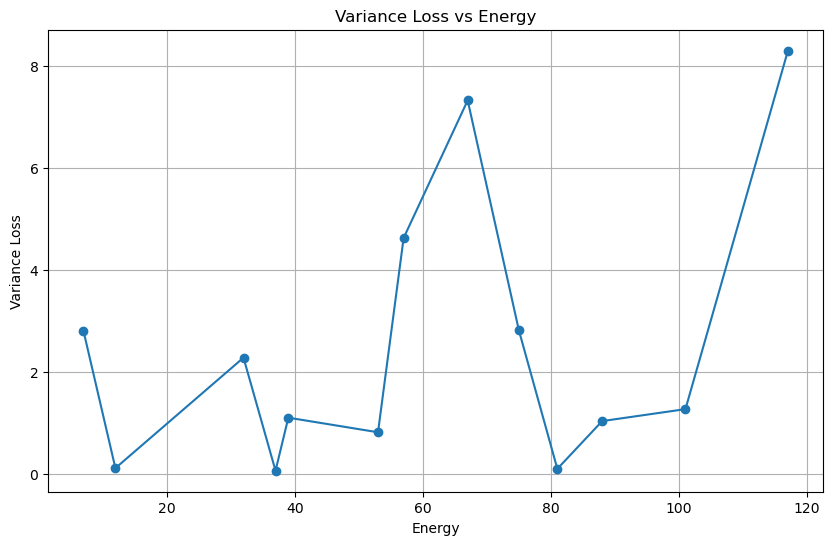

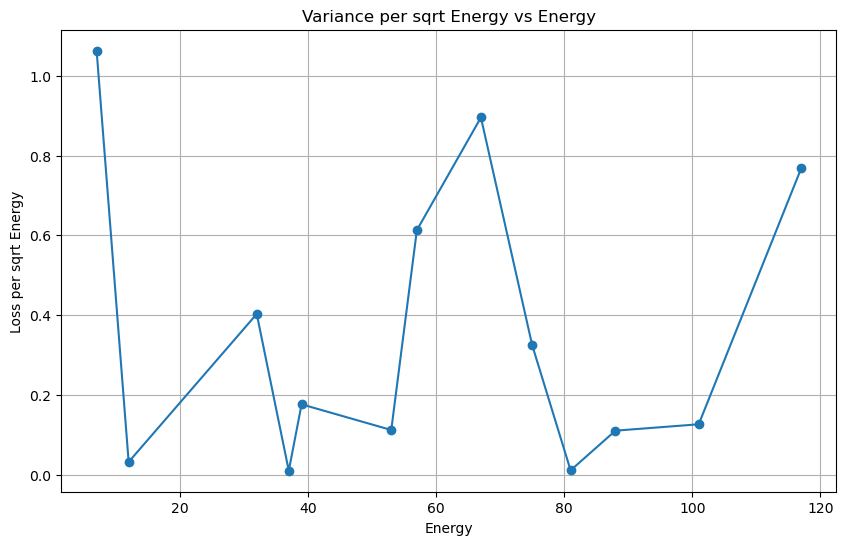

In [25]:
variance_test_df, mean_variance_loss_test = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=test_id_df, test_df=test_df, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed)


Observed time points: [0.        1.0471976]


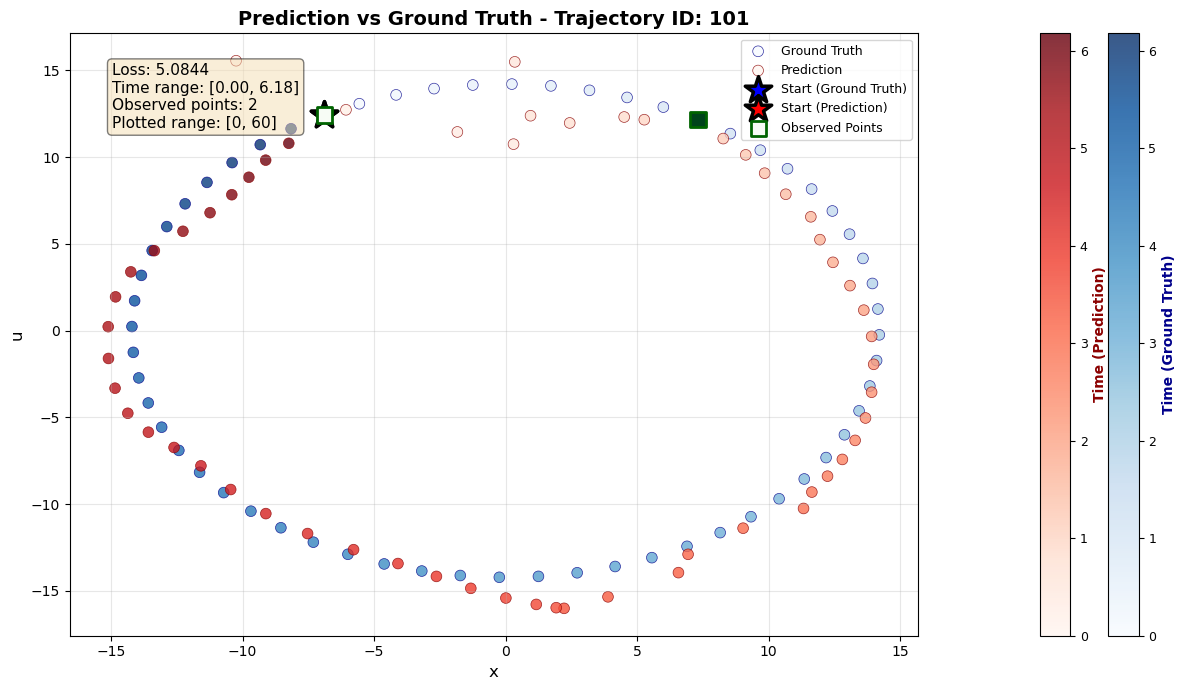

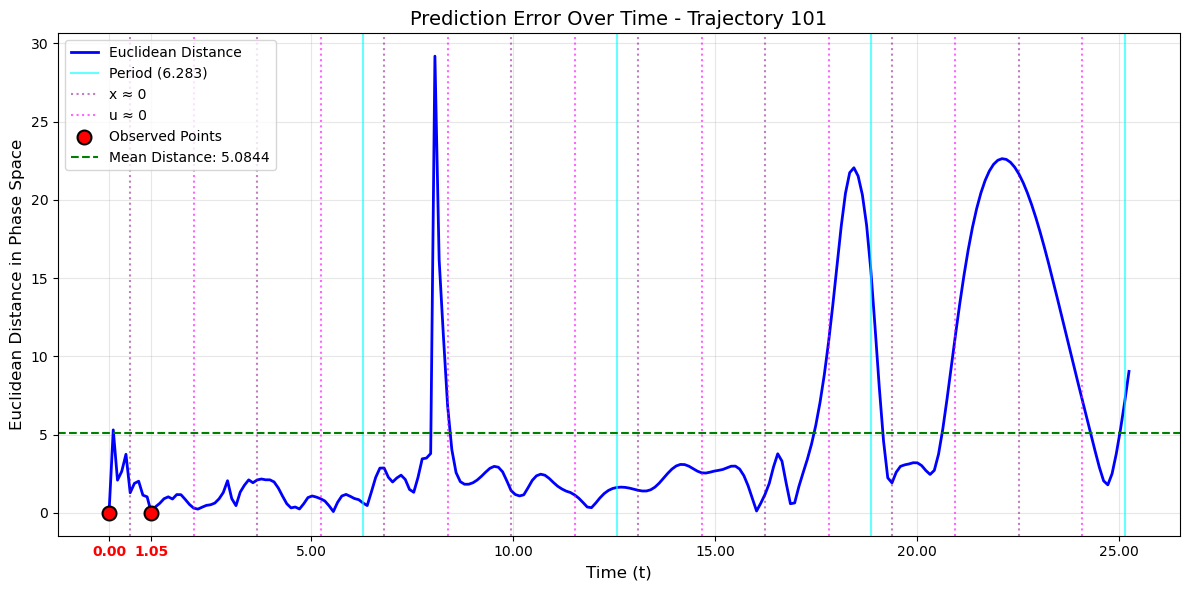

In [26]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df, test_df=test_df, trajectory_id=101, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[0,60], show_zeroings=True, show_period=True, period=period)

In [27]:
point_indexes_observed_high_energy = [0,20]

    trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
2               2  129.709677         1.820968              0.159888
4               4  138.419355         8.243805              0.700695
5               5  142.774194         9.719879              0.813460
6               6  147.129032         2.389648              0.197008
9               9  160.193548         3.419359              0.270161
10             10  164.548387         5.309447              0.413907
12             12  173.258065         4.403708              0.334558
14             14  181.967742         3.461444              0.256602
15             15  186.322581        15.044276              1.102145
17             17  195.032258        26.458542              1.894579
19             19  203.741935        14.154988              0.991675
20             20  208.096774         9.866042              0.683928
22             22  216.806452         6.369257              0.432566
26             26  234.225806     

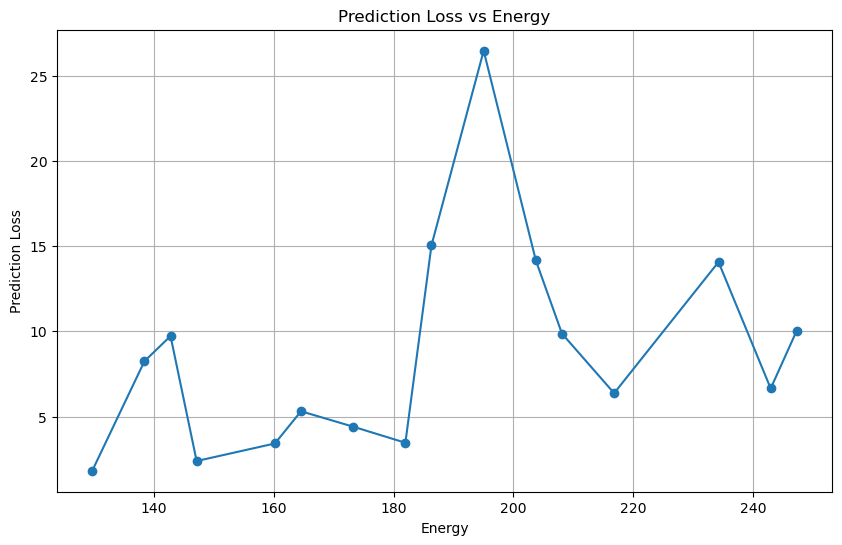

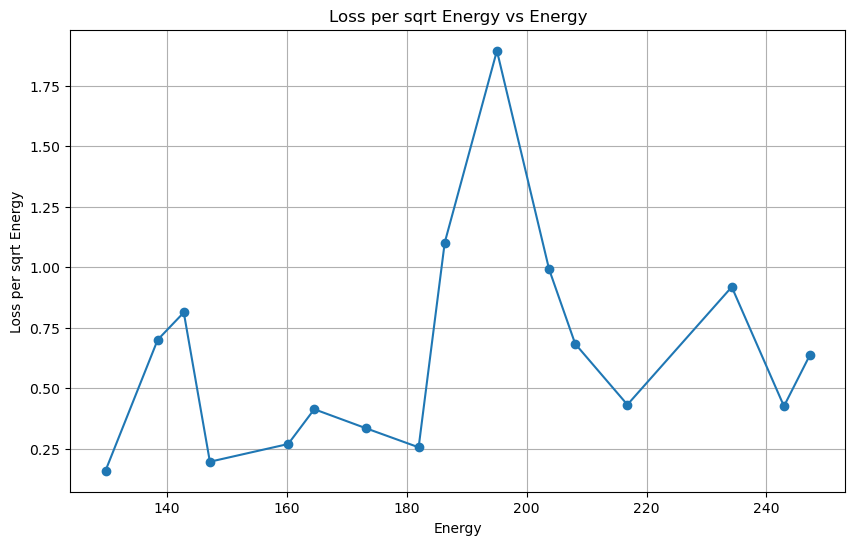

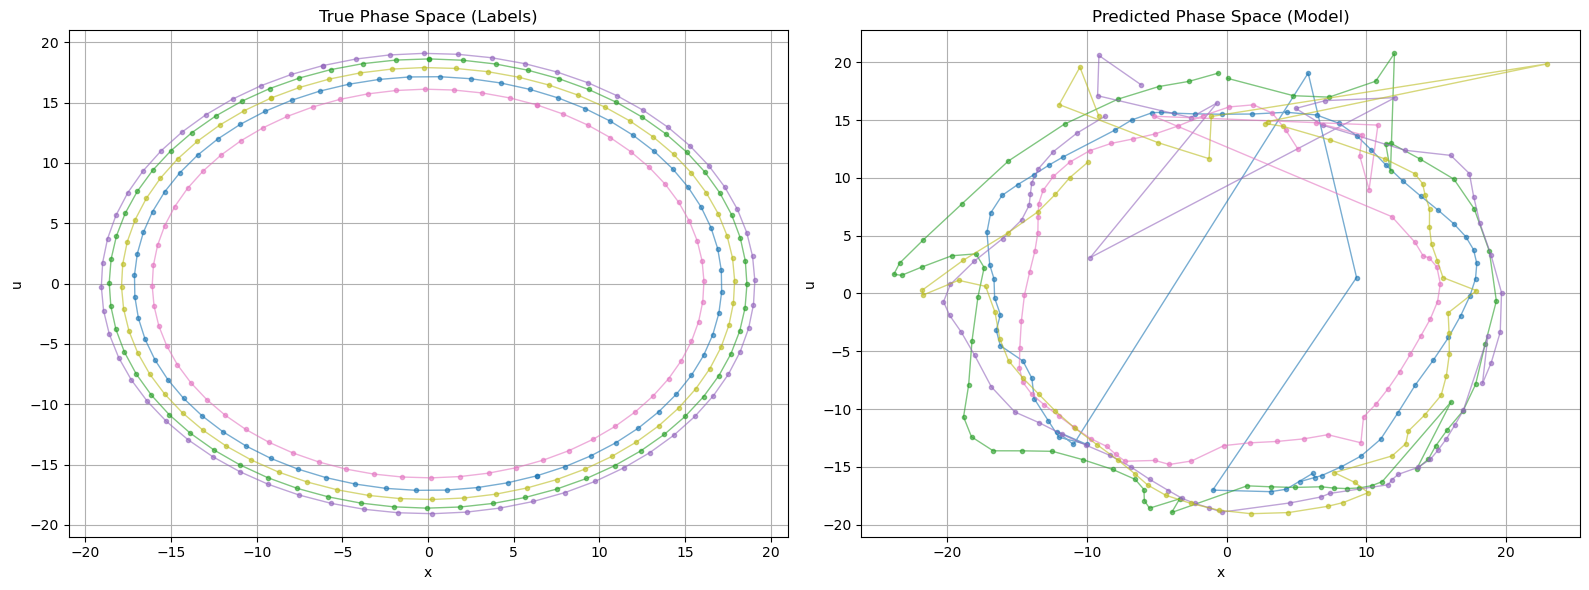

In [32]:
prediction_test_high_energy_df, mean_prediction_loss_test_high_energy, pred_test_high_energy_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed_high_energy, recreate_and_plot_phase_space=True, plot_specific_portion=1.0, connect_points=True, plot_trajectories_subsample=0.3)

    trajectory_id      energy  variance_loss  variance_per_sqrt_energy
2               2  129.709677       6.264015                  0.550005
4               4  138.419355       5.087184                  0.432393
5               5  142.774194       1.502544                  0.125748
6               6  147.129032       1.481294                  0.122121
9               9  160.193548      41.265072                  3.260319
10             10  164.548387     111.976128                  8.729284
12             12  173.258065      39.808201                  3.024307
14             14  181.967742      16.074785                  1.191648
15             15  186.322581      50.474800                  3.697787
17             17  195.032258     179.664795                 12.864999
19             19  203.741935      31.676216                  2.219183
20             20  208.096774      94.139633                  6.525891
22             22  216.806452     173.109833                 11.756705
26    

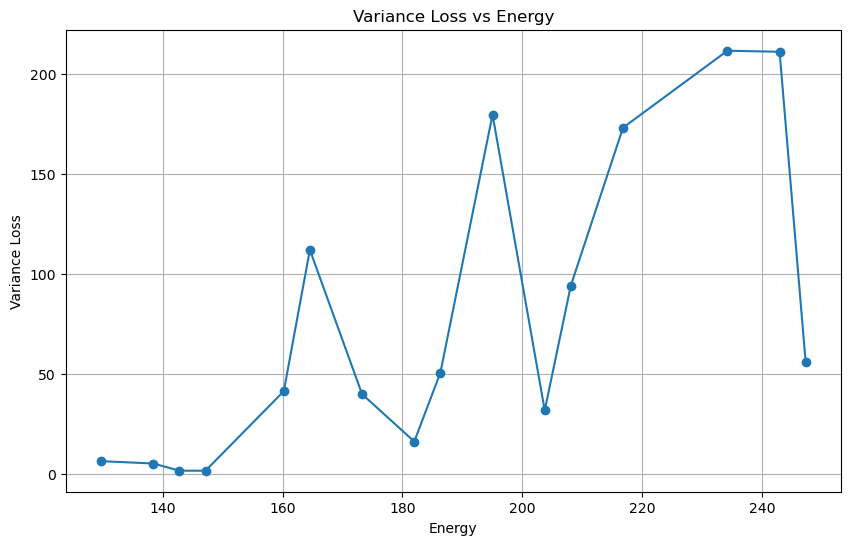

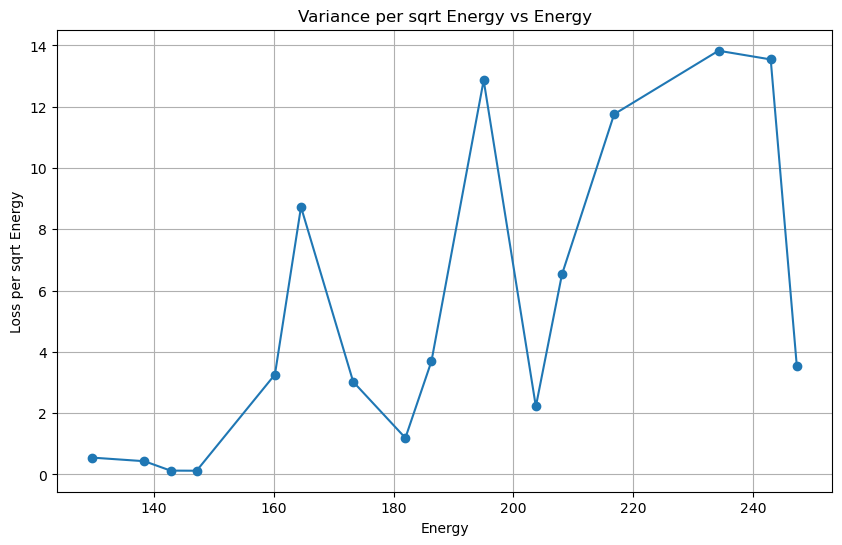

In [33]:
variance_test_high_energy_df, mean_variance_loss_test_high_energy = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed_high_energy)


Observed time points: [0.        2.0943952]


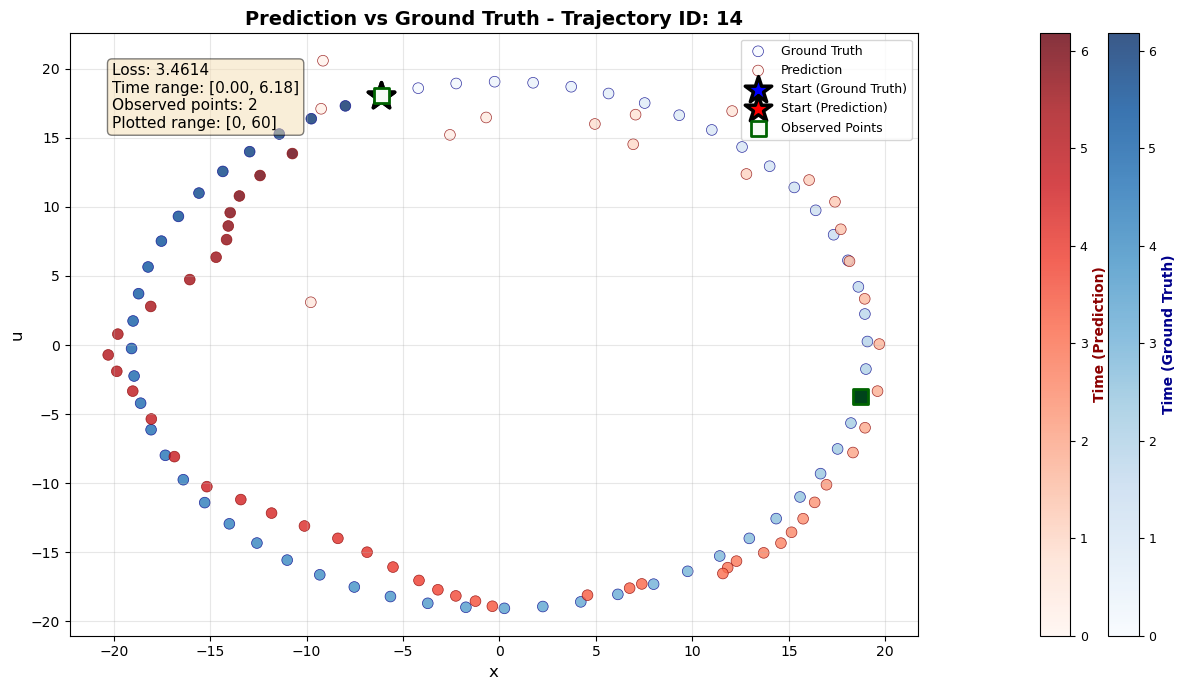

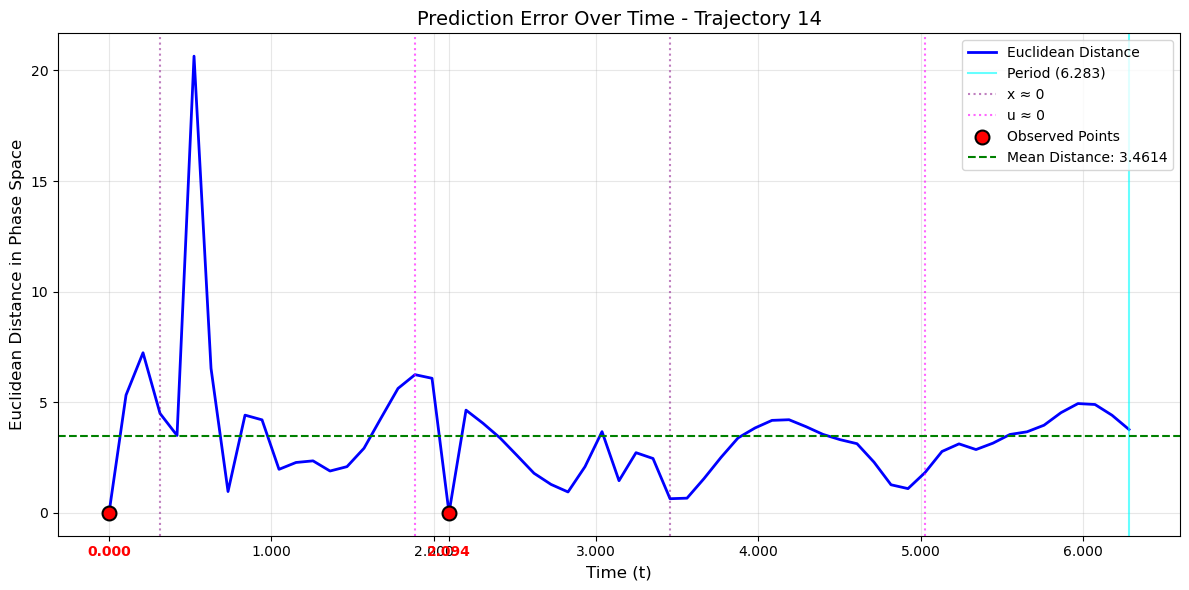

In [34]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, trajectory_id=14, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed_high_energy, connect_points=False, portion_to_visualize=[0,60], show_zeroings=True, show_period=True, period=period)

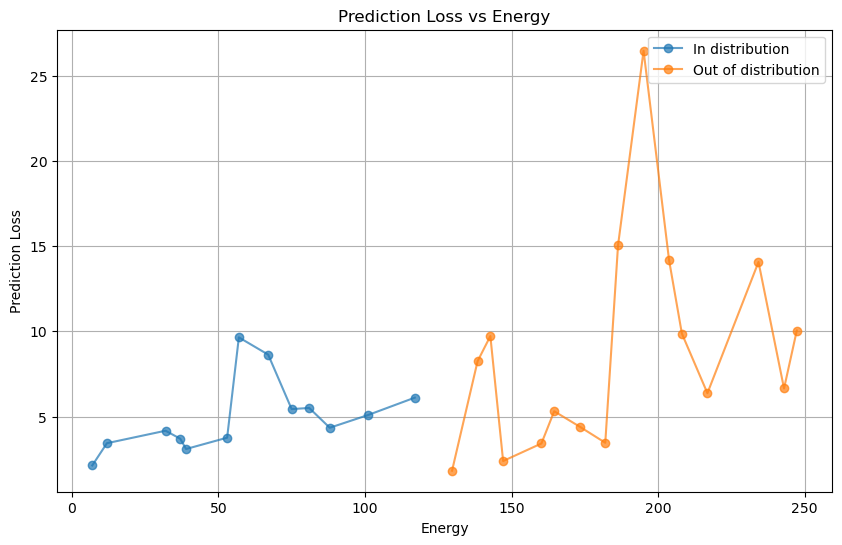

In [35]:
plot_prediction_losses([prediction_test_df, prediction_test_high_energy_df])

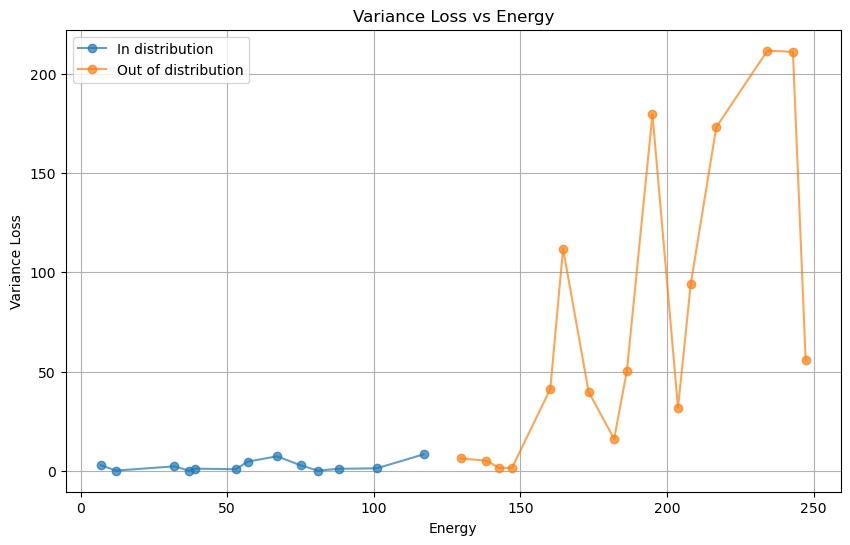

In [36]:
plot_variance_losses([variance_test_df, variance_test_high_energy_df])

Step 1 gamma values mean: 1.802±2.713

Step 2 gamma values mean: 2.080±2.321



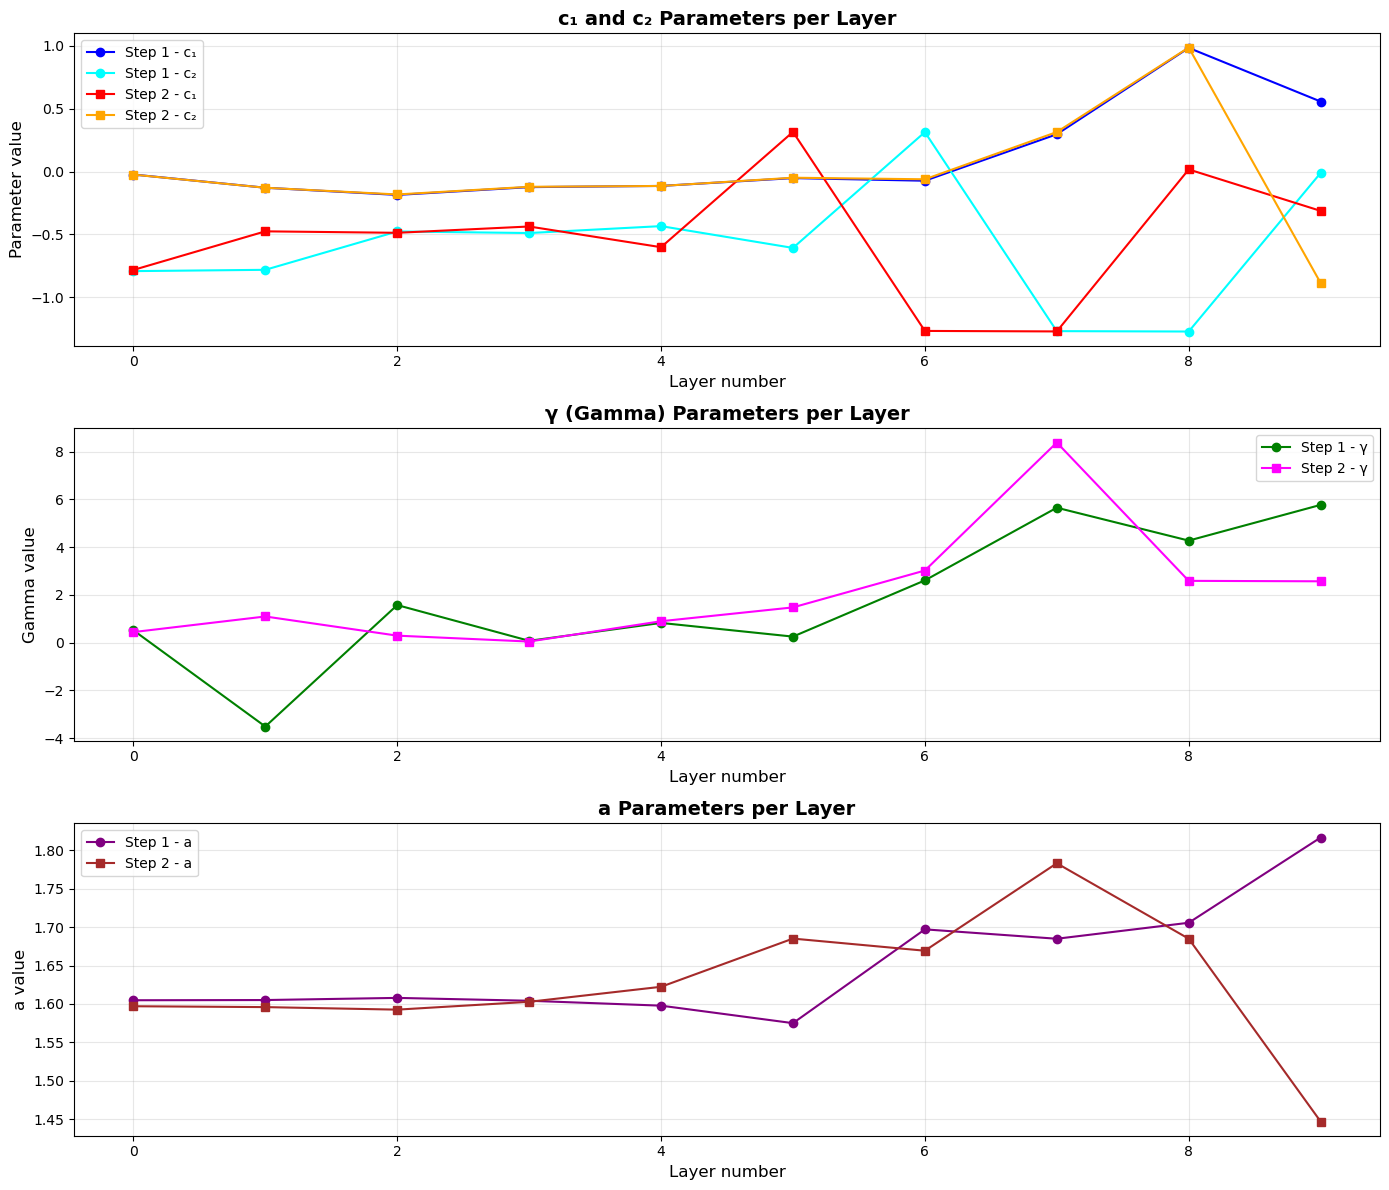

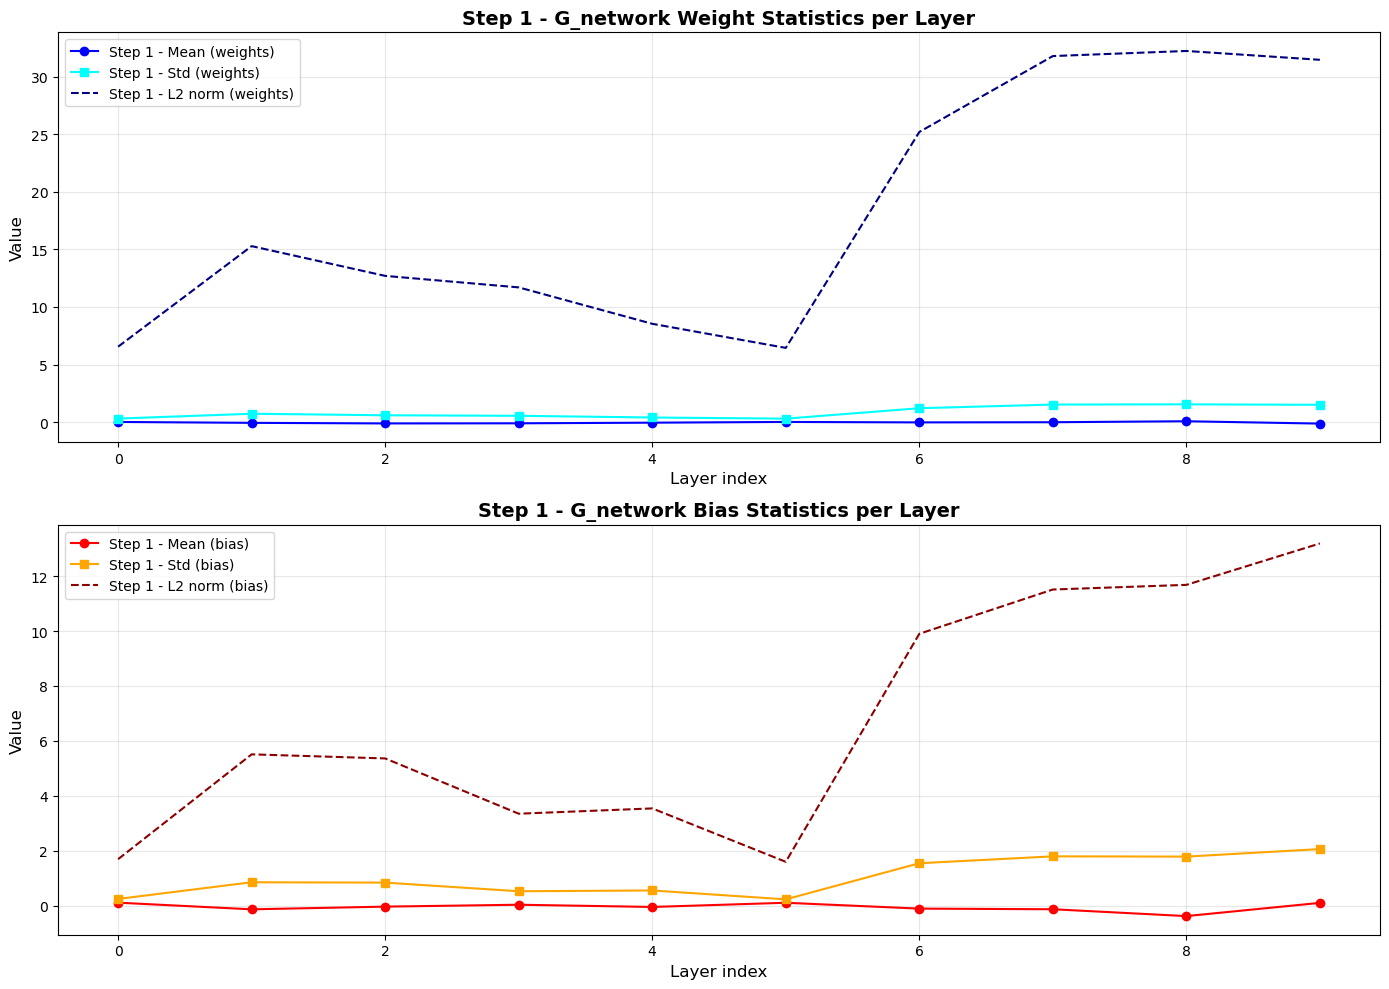

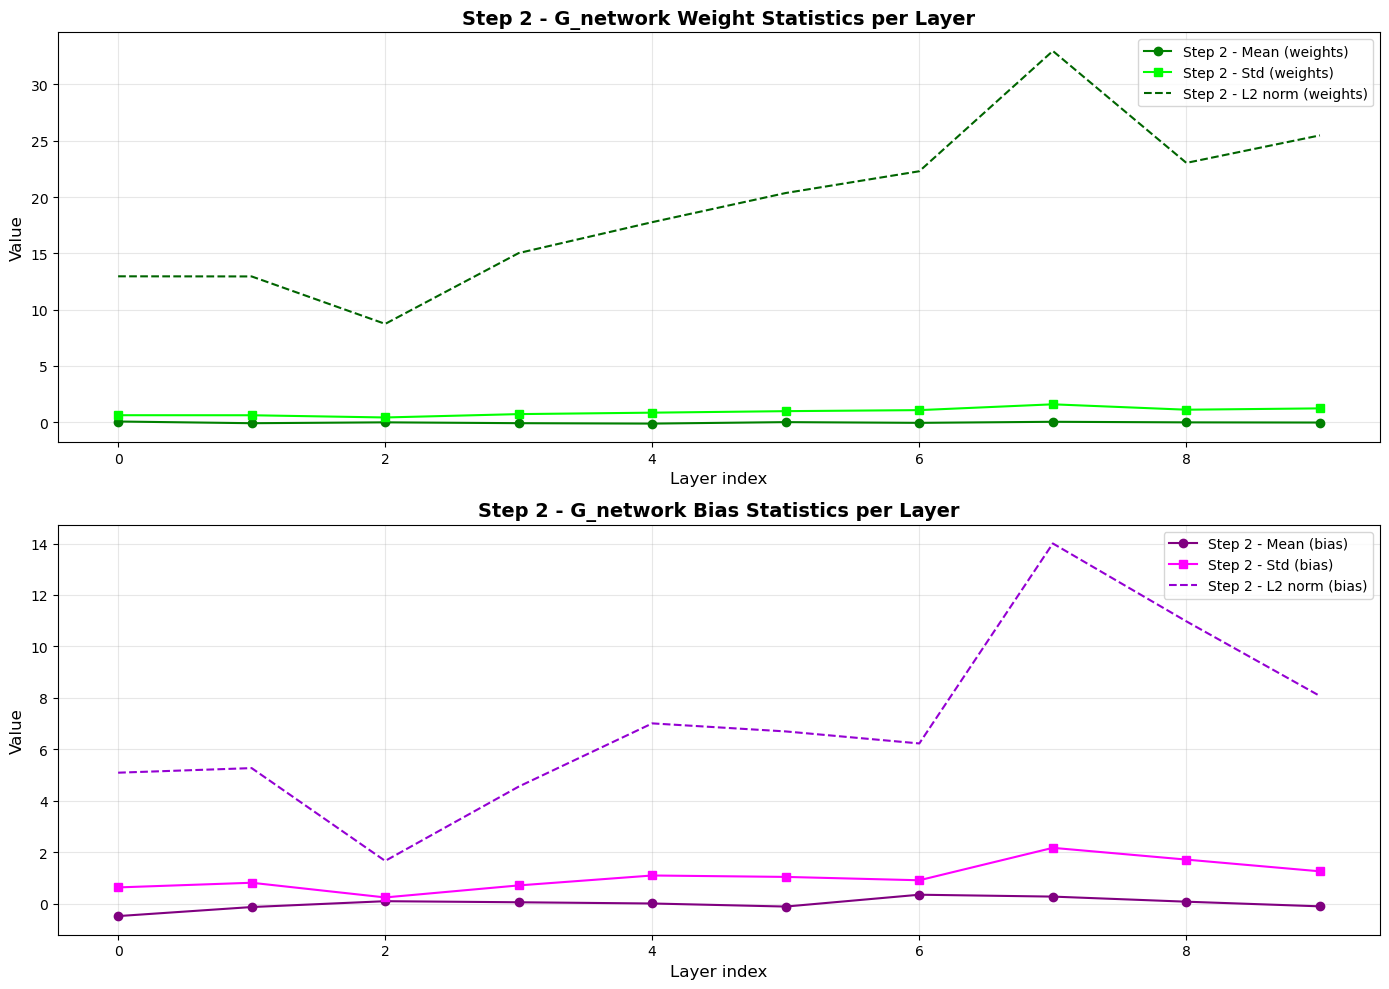

In [9]:
param_data = analyze_mapping_net(mapping_net, return_lists=True)


In [102]:
    mapping_net_test = SimpleStackedHamiltonianNetwork(
        #Hpw many Step_1 + Step_2 layers to stack
        n_layers=10,
        # MLP Architecture parameters
        hidden_dims= [33, 60, 32],
        n_hidden_layers = None,   #Leave None if you provide list on hidden_dims
        
        # Activation parameters
        activation = 'gelu',
        activation_params = None,
        final_activation = None,   #Final layer activation function
        final_activation_only_on_final_layer = True,
        tanh_wrapper = False,
        
        # Initialization parameters
        weight_init = 'orthogonal',
        weight_init_params = {'gain': 1},
        bias_init = 'zeros',
        bias_init_value = 0.0,
        
        
        # Architectural choices
        use_bias = True,
        use_layer_norm = False,
        
        # Input/Output parameters
        input_dim = 2,  # x or u and t
        output_dim = 1,  # scalar G or F
        a_eps_min= 0.5,  # Minimum value for a
        a_eps_max= 2,  # Maximum value for a  
        a_k= 0.1,

        step_1_a_mean_innit= 1.0,
        step_2_a_mean_innit= 1.0,
        std_to_mean_ratio_a_mean_init= 0.3,

        step_1_gamma_mean_innit= 3.5,
        step_2_gamma_mean_innit= 2.5,
        std_to_mean_ratio_gamma_mean_init= 0.3,

        step_1_c1_mean_innit= 0.0,
        step_2_c1_mean_innit= 0.0,
        std_to_mean_ratio_c1_mean_init= 0.0,

        step_1_c2_mean_innit= 0.0,
        step_2_c2_mean_innit= 0.0,
        std_to_mean_ratio_c2_mean_init= 0.0,

        bound_innit=0.0,
    )
    

In [103]:
count_parameters(mapping_net_test)

82560

In [67]:
count_parameters(mapping_net_test)

15260